In [1]:
import numpy as np
from scipy.stats import t
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt

In [2]:


def ead_scaled_student_t(nu):
    """
    Computes the Expected Absolute Deviation (EAD) of a scaled Student's t-distribution
    with mean 0 and variance 1.
    
    Parameters:
    - nu: degrees of freedom of the t-distribution (must be > 2 for variance to exist)
    
    Returns:
    - EAD: Expected Absolute Deviation
    """
    if nu <= 2:
        raise ValueError("Degrees of freedom nu must be > 2 for variance to exist.")
    
    # Scaling factor to ensure variance = 1
    scale = np.sqrt(nu / (nu - 2))
    
    # Define the scaled PDF of the t-distribution
    pdf_scaled = lambda x: t.pdf(x / scale, df=nu) / scale
    
    # Compute the expected absolute deviation using numerical integration
    ead, _ = quad(lambda x: x * pdf_scaled(x), 0, np.inf)
    return 2 * ead  # Multiply by 2 because of symmetry


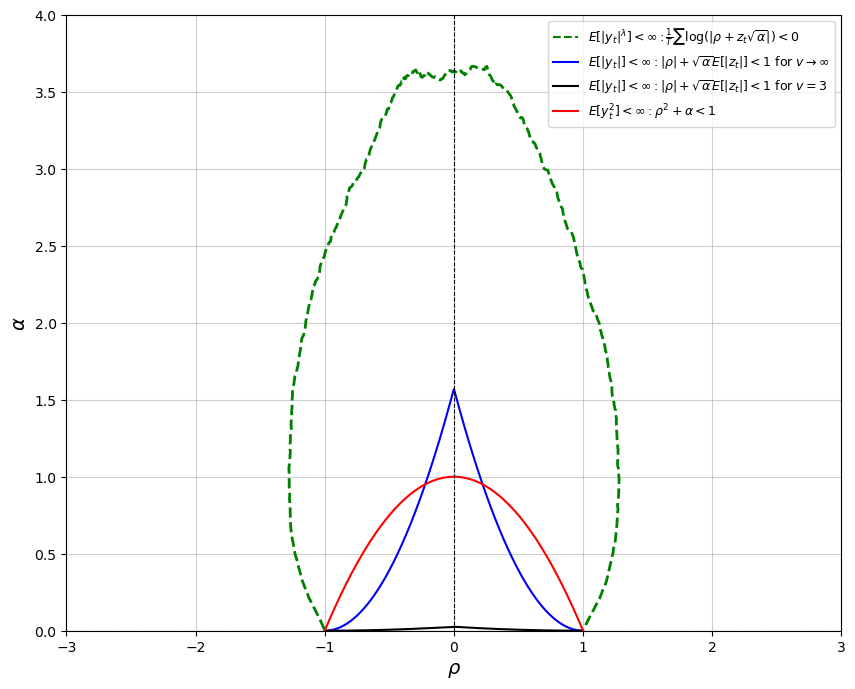

In [3]:
v = 2.1
expected_abs_z = ead_scaled_student_t(v)


# Constants
pi = np.pi
T = 10000  # Number of samples
z_samples = np.random.normal(0, 1, T)  # Draw T samples from N(0, 1)

# Define ranges for rho and alpha
rho_vals = np.linspace(-2.5, 2.5, 500)
alpha_vals = np.linspace(0.01, 5, 500)  # Avoid alpha = 0 for stability

# Grid to evaluate the condition
Rho, Alpha = np.meshgrid(rho_vals, alpha_vals)

# Compute the average log for the condition
log_condition = np.zeros_like(Rho)
for i in range(Rho.shape[0]):  # For each alpha
    for j in range(Rho.shape[1]):  # For each rho
        rho = Rho[i, j]
        alpha = Alpha[i, j]
        log_terms = np.log(np.abs(rho + z_samples * np.sqrt(alpha)))
        log_condition[i, j] = np.mean(log_terms)

# Determine the boundary where the condition transitions from < 0 to >= 0
contour_levels = [0]  # We are interested in the zero-level line

# Plot the curves and contours
plt.figure(figsize=(10, 8))

# Contour: 1/T ∑ log(|ρ + z_t √α|) = 0
contour = plt.contour(Rho, Alpha, log_condition, levels=contour_levels, colors='green', linewidths=2, linestyles='--')
# Add a dummy plot to include "Condition 3" in the legend
plt.plot([], [], color='green', linestyle='--', label=r'$E[|y_t|^{\lambda}] < \infty :\frac{1}{T}\sum\log(|\rho + z_t \sqrt{\alpha}|) < 0$')

# Curve: v-> infinity
rho_curve = np.linspace(-1, 1, 1000)  # |ρ| ≤ 1 for the equation to make sense
alpha_curve1 = (np.pi / 2) * (1 - np.abs(rho_curve))**2
plt.plot(rho_curve, alpha_curve1, label=r'$ E[|y_t|] < \infty :|\rho| + \sqrt{\alpha} E[|z_t|] < 1$ for $v \to \infty$', color='blue')

# Curve: v
rho_curve = np.linspace(-1, 1, 1000)  # |ρ| ≤ 1 for the equation to make sense
alpha_curve3 = ( (1 - np.abs(rho_curve) ) /expected_abs_z )**2
plt.plot(rho_curve, alpha_curve3, label=rf'$ E[|y_t|] < \infty :|\rho| + \sqrt{{\alpha}} E[|z_t|] < 1$ for $v = {3}$', color='black')

# Curve: ρ^2 + α = 1
rho_curve2 = np.linspace(-1, 1, 500)
alpha_curve2 = 1 - rho_curve2**2
plt.plot(rho_curve2, alpha_curve2, label=r'$E[y_t^2] < \infty : \rho^2 + \alpha < 1$', color='red')

# Labels and legend
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Alpha axis
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Rho axis
plt.xlabel(r'$\rho$', fontsize=14)
plt.ylabel(r'$\alpha$', fontsize=14)

plt.legend(fontsize=9, loc='upper right')
plt.grid(alpha=0.6)
plt.ylim(0, 4)
plt.xlim(-3, 3)

# Show the plot
plt.show()


In [148]:
# Define the integrand
def integrand(x):
    return np.sqrt(abs(x)) * (1/np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)

# Compute the integral
expected_value, _ = integrate.quad(integrand, -np.inf, np.inf)
print(f"Expected value of sqrt(|z_t|): {expected_value}")


Expected value of sqrt(|z_t|): 0.8221789586624582


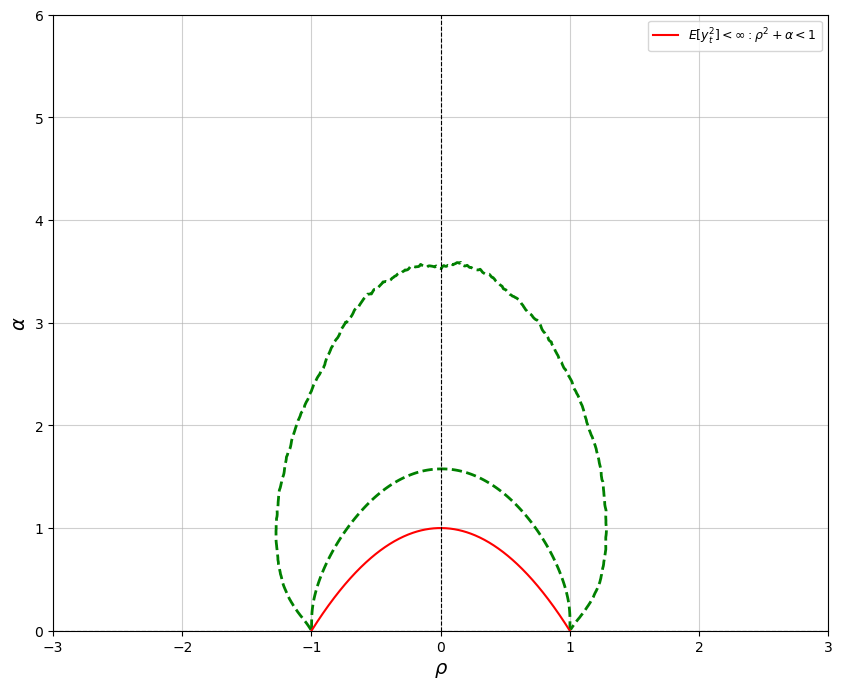

In [6]:
v = 100000 # 
T = 20000
#z_samples = np.random.normal(0, 1, T)  # Draw T samples from N(0, 1)
z_samples = t.rvs(df=v, size = T) / np.sqrt(v / (v - 2))  # Standardized Student-t random variables

# Define ranges for rho and alpha
rho_vals = np.linspace(-2.5, 2.5, 500)
alpha_vals = np.linspace(0.01, 10, 500)  # Avoid alpha = 0 for stability

# Grid to evaluate the condition
Rho, Alpha = np.meshgrid(rho_vals, alpha_vals)

# Compute the average log for the condition
log_condition1 = np.zeros_like(Rho)
log_condition2 = np.zeros_like(Rho)

for i in range(Rho.shape[0]):  # For each alpha
    for j in range(Rho.shape[1]):  # For each rho
        rho = Rho[i, j]
        alpha = Alpha[i, j]
        
        log_terms1 = np.abs(rho + np.sqrt(alpha) * z_samples)
        log_condition1[i, j] = np.mean(log_terms1)

        log_terms2 = np.log(np.abs(rho + z_samples * np.sqrt(alpha)))
        log_condition2[i, j] = np.mean(log_terms2)



# Determine the boundary where the condition transitions from < 0 to >= 0
contour_levels1 = [1]
contour_levels2 = [0]


plt.figure(figsize=(10, 8))

# Contour: 1/T ∑ log(|ρ + z_t √α|) = 0
contour = plt.contour(Rho, Alpha, log_condition1, levels=contour_levels1, colors='green', linewidths=2, linestyles='--')
plt.plot([], [], color='green', linestyle='--', label=r'')


contour = plt.contour(Rho, Alpha, log_condition2, levels=contour_levels2, colors='green', linewidths=2, linestyles='--')
plt.plot([], [], color='green', linestyle='--', label=r'')



# Curve: ρ^2 + α = 1
rho_curve = np.linspace(-1, 1, 500)
alpha_curve = 1 - rho_curve**2
plt.plot(rho_curve, alpha_curve, label=r'$E[y_t^2] < \infty : \rho^2 + \alpha < 1$', color='red')



# Labels and legend
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Alpha axis
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')  # Rho axis
plt.xlabel(r'$\rho$', fontsize=14)
plt.ylabel(r'$\alpha$', fontsize=14)

plt.legend(fontsize=9, loc='upper right')
plt.grid(alpha=0.6)
plt.ylim(0, 6)
plt.xlim(-3, 3)

# Show the plot
plt.show()

In [5]:
# Define the range for the variables
rho = np.linspace(-1.5, 1.5, 100)  # ρ values between -2 and 2
phi = np.linspace(-1, 1, 100)  # φ values between -2 and 2
rho, phi = np.meshgrid(rho, phi)

with np.errstate(divide='ignore', invalid='ignore'):  # Handle divisions safely
    alpha = np.maximum(0, (1 - rho**2) * (1 - phi**2))

rho.shape, phi.shape, alpha.shape

((100, 100), (100, 100), (100, 100))

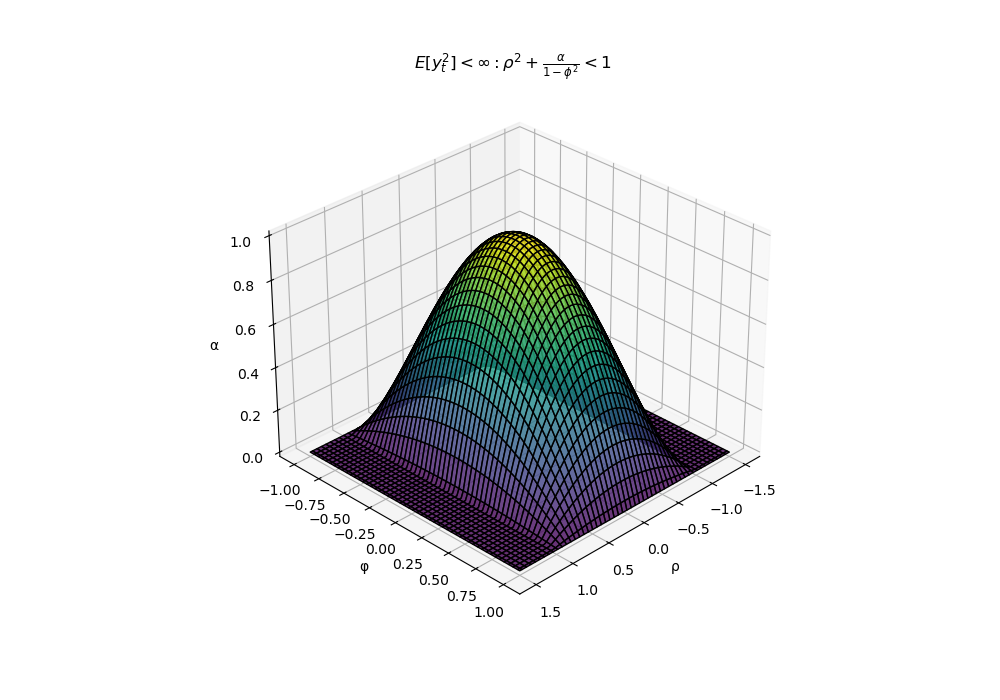

In [1]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the range for the variables
rho = np.linspace(-1.5, 1.5, 100)  # ρ values between -2 and 2
phi = np.linspace(-1, 1, 100)  # φ values between -2 and 2
rho, phi = np.meshgrid(rho, phi)

# Compute α based on the constraint ρ^2 + α / (1 - φ^2) = 1
# Ensure α is weakly positive
with np.errstate(divide='ignore', invalid='ignore'):  # Handle divisions safely
    alpha = np.maximum(0, (1 - rho**2) * (1 - phi**2))

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(rho, phi, alpha, cmap='viridis', edgecolor='k', alpha=0.8)

# Label axes
ax.set_xlabel('ρ')
ax.set_ylabel('φ') # φ
ax.set_zlabel('α') # α

# Add a title
ax.set_title('$E[y_t^2] < \infty : \\rho^2 + \\frac{\\alpha}{1 - \\phi^2} < 1$')

# Rotate the plot
ax.view_init(elev=30, azim=45)  # Set the view angle

# Show plot
plt.show()


# Spectral Radius

In [4]:
def spectral_radius(matrix):
    return np.max(np.abs(np.linalg.eigvals(matrix)))

In [224]:
T = 10000
p = 1

ETA = np.random.normal(loc=0, scale=1, size=(T, p))
ETA.shape

(10000, 1)

In [186]:
t = np.arange(start=-1, stop=-(T+1), step=-1)
max_lag = p

ETA = np.vstack((np.full((max_lag, ETA.shape[1]), np.nan), ETA))
eta = lambda t: ETA[t,:]

In [225]:
eta(t).mean()

-0.042698347609984144

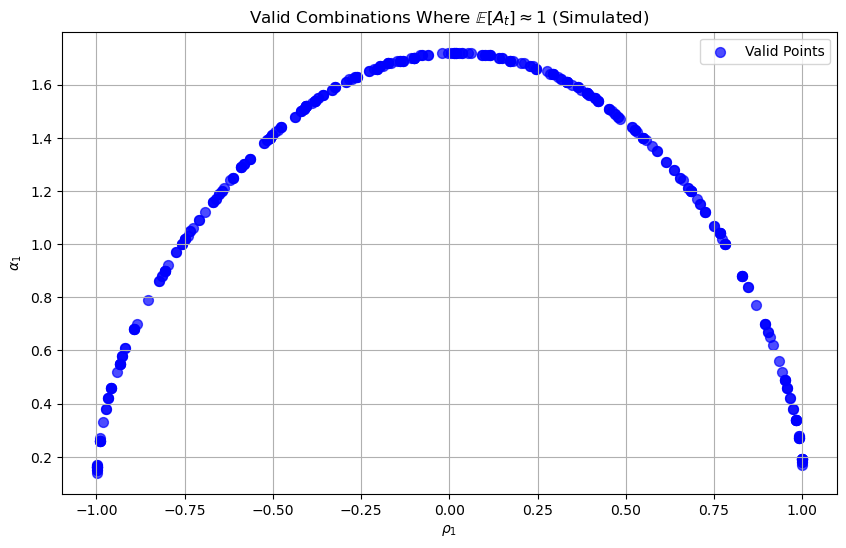

In [331]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1000  # Number of time steps for sampling z_t
num_samples = 500000  # Number of random combinations to test
tolerance = 1e-3  # Tolerance for expectation close to 1
step = 500

# Simulate z_t (standard normal noise)
z_t = np.random.normal(0, 1, T)

# Range of values to sample
rho_1_range = np.linspace(-2, 2, step)
alpha_1_range = np.linspace(0.01, 5, step)

# Store valid combinations
valid_combinations = []

# Randomly sample values for rho_1 and alpha_1
for _ in range(num_samples):
    # Sample random values
    rho_1 = np.random.choice(rho_1_range)
    alpha_1 = np.random.choice(alpha_1_range)
    
    # Compute the simulated expectation of A_t
    A_t_samples = rho_1 + np.sqrt(alpha_1) * z_t  # Scalar values for all z_t
    simulated_expectation = np.mean(np.abs(A_t_samples))  # Numerical expectation
    
    # Check if the simulated expectation is approximately 1
    if np.isclose(simulated_expectation, 1, atol=tolerance):
        valid_combinations.append((rho_1, alpha_1))

# Extract valid combinations and plot results
if len(valid_combinations) > 0:
    # Convert valid_combinations to a NumPy array
    valid_combinations = np.array(valid_combinations)
    
    # Extract rho_1 and alpha_1 values
    rho_1 = valid_combinations[:, 0]
    alpha_1 = valid_combinations[:, 1]

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.scatter(rho_1, alpha_1, color='blue', s=50, alpha=0.7, label='Valid Points')
    plt.xlabel(r"$\rho_1$")
    plt.ylabel(r"$\alpha_1$")
    plt.title(r"Valid Combinations Where $\mathbb{E}[A_t] \approx 1$ (Simulated)")
    plt.grid()
    plt.legend()
    plt.show()
else:
    print("No valid combinations found.")


# PlZ work

## Second order

In [488]:
rho_1 = 0.5
rho_2 = 0.5
alpha_1 = 0.01
alpha_2 = 0.01

T = 4000

A_t_sum = np.zeros((4, 4))

for _ in range(T):
        z1_t = np.random.normal(0, 1)
        z2_t = np.random.normal(0, 1) 
        A_t = np.array([
            [rho_1 + np.sqrt(alpha_1) * z1_t, rho_2 + np.sqrt(alpha_2) * z2_t],
            [1, 0]
        ])
        
        #A_t_sum += A_t
        A_t_sum += np.kron(A_t, A_t)
        E_A_t = A_t_sum / T
    
radius = spectral_radius(E_A_t)
print(radius)
np.abs(rho_1) + np.abs(rho_2) + alpha_1 + alpha_2

1.0077194050661624


1.02

## first order

In [1585]:
from scipy.stats import t as student
nu = 2.0001

rho_1 = 0.8
rho_2 = 0.2
alpha_1 = 1
alpha_2 = 1

T = 40000

cond2 = []
A_t_sum = np.zeros((2, 2))

for _ in range(T):
        z1_t = student.rvs(df=nu) * np.sqrt((nu - 2) / nu)
        z2_t = student.rvs(df=nu) * np.sqrt((nu - 2) / nu)

        A_t = np.array([
            [rho_1 + np.sqrt(alpha_1) * z1_t, rho_2 + np.sqrt(alpha_2) * z2_t],
            [1, 0]
        ])
        A_t_sum += A_t
        E_A_t = A_t_sum / T
    
radius = spectral_radius(E_A_t)
print(radius)

# second condition
z1_t = student.rvs(df=nu , size = T) * np.sqrt((nu - 2) / nu)
z2_t = student.rvs(df=nu , size = T) * np.sqrt((nu - 2) / nu)
second_condition= np.mean(np.abs(rho_1 + np.sqrt(alpha_1) * z1_t)) + np.mean(np.abs(rho_2 + np.sqrt(alpha_2) * z2_t))
print(second_condition)

# third condition
z1_t = student.rvs(df=nu , size = T) * np.sqrt((nu - 2) / nu)
z2_t = student.rvs(df=nu , size = T) * np.sqrt((nu - 2) / nu)
third_condition = np.abs(rho_1) + np.abs(rho_2) + np.mean(np.abs(z1_t)) * alpha_1 + np.mean(np.abs(z2_t)) * alpha_2
print(third_condition)

1.0000325429593508
1.0001103108582634
1.0200202833238208


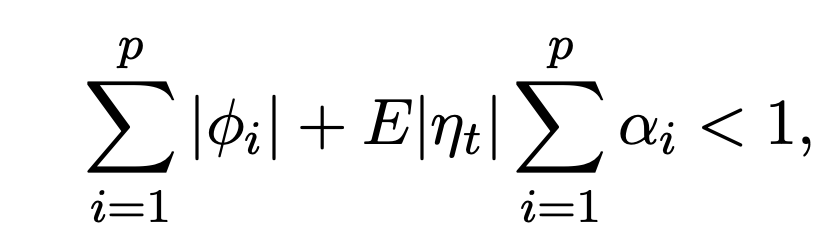

In [1697]:
nu = 2.3
T = 400001
z1_t = student.rvs(df=nu , size = T) * np.sqrt((nu - 2) / nu)
np.mean(np.abs(z1_t))
np.var(z1_t)

1.128737400216722

In [1887]:
def compute_tau_sequence(A, norm_type='fro'):

    t_max, p, p_check = A.shape
    assert p == p_check, "Matrices must be square (p x p)."
    
    log_norms = []
    cumulative_product = np.eye(p)

    for t in range(t_max):
        # Multiply the cumulative product by A_t
        cumulative_product = np.dot(cumulative_product, A[t])
        
        # Compute the norm of the cumulative product
        norm_val = np.linalg.norm(cumulative_product, ord=norm_type)
        
        # Prevent log(0) by ensuring norm_val > 0
        if norm_val > 0:
            log_norms.append(np.log(norm_val) / (t + 1))
        else:
            log_norms.append(float('-inf'))
    
    # τ is approximated as the last computed value
    tau_approx = log_norms[-1]
    
    return tau_approx



In [1888]:
import numpy as np

def compute_tau_sequence_stable(A, norm_type='fro'):
    
    t_max, p, p_check = A.shape
    assert p == p_check, "Matrices must be square (p x p)."

    log_sum = 0.0  # Accumulate the logarithm of the norm of each product
    cumulative_matrix = np.eye(p)  # Start with the identity matrix

    for t in range(t_max):
        # Multiply the current matrix A[t] with the cumulative product
        cumulative_matrix = np.dot(cumulative_matrix, A[t])
        
        # Compute the norm of the cumulative product (scaled to avoid overflow)
        norm_val = np.linalg.norm(cumulative_matrix, ord=norm_type)
        
        if norm_val > 0:
            # Accumulate the log of the norm
            log_sum += np.log(norm_val)
            
            # Normalize the cumulative matrix to prevent overflow
            cumulative_matrix /= norm_val
        else:
            return float('-inf')  # Numerical instability or invalid matrix product
        
    # τ is approximated by the average logarithmic norm
    tau_approx = log_sum / t_max
    
    return tau_approx




In [1893]:
T = 100000  # Number of realisations
p = 2 # lag

rho_bound = 1.01
alpha_bound = 0.1

# Generate eta
nu = 2.1
eta = np.random.normal(0, 1, (p, T))
#eta = student.rvs(df=nu, size=(p, T)) * np.sqrt((nu - 2) / nu)

print(eta.shape)

# Upper Row
gen_array = lambda p, upper_bound: ((-1 if upper_bound < 0 else 1) * 
                                    np.random.dirichlet(np.ones(p)) * abs(upper_bound)).reshape(-1, 1)
rho_gen = gen_array(p, rho_bound)
alpha_gen = gen_array(p, alpha_bound)

upper_row = (rho_gen + np.sqrt(alpha_gen) * eta).T 

# Lower Rows
identity_matrix = np.eye(p - 1)
zero_column = np.zeros((p - 1, 1))
bottom_rows = np.hstack((identity_matrix, zero_column))

# Companion Matrix
A = np.array([np.vstack((row, bottom_rows)) for row in upper_row])

# Sum all matrices efficiently
A_exptected = np.sum(A, axis=0) / T

spectral = spectral_radius(A_exptected)
np.log(spectral), spectral

(2, 100000)


(0.008503356691187056, 1.0085396129223883)

In [1894]:
compute_tau_sequence(A), compute_tau_sequence_stable(A)

(-inf, -0.04751289747598954)

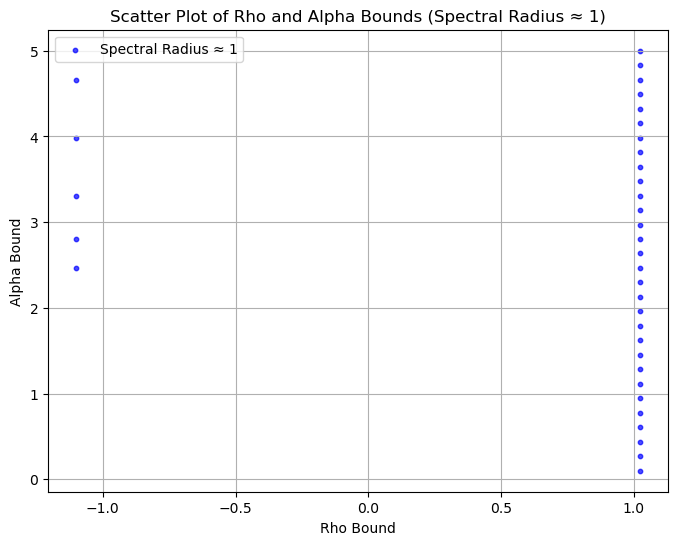

In [1432]:
import numpy as np
from scipy.stats import t as student
import matplotlib.pyplot as plt
from numpy.linalg import eigvals

# Function to calculate spectral radius
def spectral_radius(matrix):
    return max(abs(eigvals(matrix)))

# Parameters
T = 10000  # Number of realizations
p = 5  # Lag
nu = 3  # Degrees of freedom
np.random.seed(42)  # Fix random seed for reproducibility

# Generate eta
eta = student.rvs(df=nu, size=(p, T)) * np.sqrt((nu - 2) / nu)
#eta = np.random.normal(0, 1, (p, T))

# Grid of rho_bound and alpha_bound
rho_bounds = np.linspace(-1.1, 1.1, 30)  # Example range for rho_bound
alpha_bounds = np.linspace(0.1, 5, 30)  # Example range for alpha_bound

# Tolerance for spectral radius ≈ 1
tolerance = 0.01

# Store valid points where spectral_radius ≈ 1
valid_rho = []
valid_alpha = []

# Loop over all combinations of rho_bound and alpha_bound
for alpha_bound in alpha_bounds:
    for rho_bound in rho_bounds:
        # Try multiple samples for robustness
        success = False
        for _ in range(10):  # Take 10 samples per combination
            # Generate rho and alpha
            gen_array = lambda p, upper_bound: ((-1 if upper_bound < 0 else 1) * 
                                                np.random.dirichlet(np.ones(p)) * abs(upper_bound)).reshape(-1, 1)
            rho_gen = gen_array(p, rho_bound)
            alpha_gen = gen_array(p, alpha_bound)

            # Upper row
            upper_row = (rho_gen + np.sqrt(alpha_gen) * eta).T 

            # Lower rows
            identity_matrix = np.eye(p - 1)
            zero_column = np.zeros((p - 1, 1))
            bottom_rows = np.hstack((identity_matrix, zero_column))

            # Companion matrix
            A = np.array([np.vstack((row, bottom_rows)) for row in upper_row])

            # Sum all matrices efficiently
            A_expected = np.sum(A, axis=0) / T

            # Compute spectral radius
            radius = spectral_radius(A_expected)

            # Check if spectral radius is approximately 1
            if np.isclose(radius, 1, atol=tolerance):
                valid_rho.append(rho_bound)
                valid_alpha.append(alpha_bound)
                success = True
                break  # No need to try more samples for this combination

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(valid_rho, valid_alpha, color='blue', s=10, alpha=0.7, label='Spectral Radius ≈ 1')
plt.xlabel('Rho Bound')
plt.ylabel('Alpha Bound')
plt.title('Scatter Plot of Rho and Alpha Bounds (Spectral Radius ≈ 1)')
plt.legend()
plt.grid(True)
plt.show()


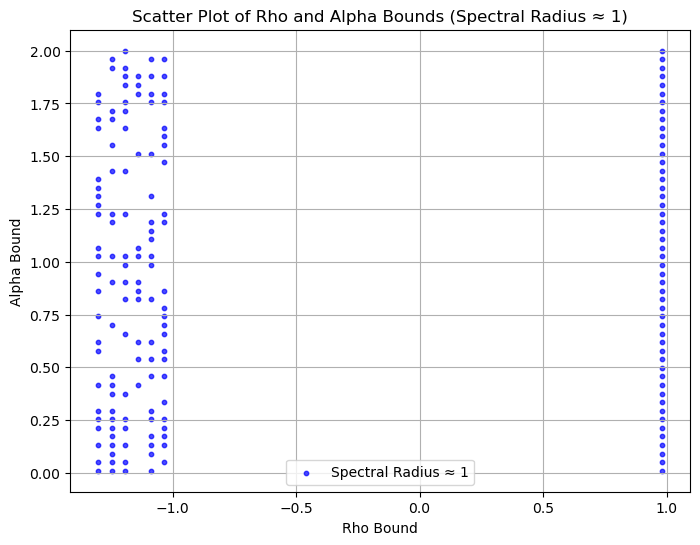

In [1702]:
from joblib import Parallel, delayed
import numpy as np
from scipy.stats import t as student
import matplotlib.pyplot as plt
from numpy.linalg import eigvals

# Function to calculate spectral radius
def spectral_radius(matrix):
    return max(abs(eigvals(matrix)))

# Generate eta outside the loop
T = 10000
p = 2
nu = 2.01
np.random.seed(42)
#eta = student.rvs(df=nu, size=(p, T)) * np.sqrt((nu - 2) / nu)
eta = np.random.normal(0, 1, (p, T))

# Generate rho and alpha
def gen_array(p, upper_bound):
    return ((-1 if upper_bound < 0 else 1) * 
            np.random.dirichlet(np.ones(p)) * abs(upper_bound)).reshape(-1, 1)

# Function to evaluate one combination
def evaluate_combination(rho_bound, alpha_bound, eta, p, T, tolerance):
    for _ in range(10):  # Try 10 samples per combination
        rho_gen = gen_array(p, rho_bound)
        alpha_gen = gen_array(p, alpha_bound)

        # Upper row
        upper_row = (rho_gen + np.sqrt(alpha_gen) * eta).T 

        # Lower rows
        identity_matrix = np.eye(p - 1)
        zero_column = np.zeros((p - 1, 1))
        bottom_rows = np.hstack((identity_matrix, zero_column))

        # Companion matrix
        A = np.array([np.vstack((row, bottom_rows)) for row in upper_row])

        # Sum all matrices efficiently
        A_expected = np.sum(A, axis=0) / T

        # Compute spectral radius
        radius = spectral_radius(A_expected)

        # Check if spectral radius is approximately 1
        #if np.isclose(radius, 1, atol=tolerance):
            #return rho_bound, alpha_bound  # Return valid point if condition met
        if np.isclose(np.log(radius), 0, atol=tolerance):
            return rho_bound, alpha_bound  # Return valid point if condition met
    
    return None

# Parameters
step = 50
rho_bounds = np.linspace(-1.3, 1.3, step)
alpha_bounds = np.linspace(0.01, 2, step)
tolerance = 0.01

# Parallel processing
results = Parallel(n_jobs=-1)(delayed(evaluate_combination)(rho, alpha, eta, p, T, tolerance)
                              for alpha in alpha_bounds for rho in rho_bounds)

# Filter out None results
valid_points = [point for point in results if point is not None]

# Extract valid rho and alpha
valid_rho, valid_alpha = zip(*valid_points)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(valid_rho, valid_alpha, color='blue', s=10, alpha=0.7, label='Spectral Radius ≈ 1')
plt.xlabel('Rho Bound')
plt.ylabel('Alpha Bound')
plt.title('Scatter Plot of Rho and Alpha Bounds (Spectral Radius ≈ 1)')
plt.legend()
plt.grid(True)
plt.show()
